# CSCI4022 Homework 5; Graphs and A-Priori

## Due Monday, March 29 at 11:59 pm to Canvas

#### Submit this file as a .ipynb with *all cells compiled and run* to the associated dropbox.

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems, except the **form of your output for #3**.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.

---

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm


***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 1 (Practice: A-Priori; 25 pts) 

Consider the Online Retail data set provided in `onlineretail.csv`.  This includes over 500,000 purchases from an online retailer.

We want to use the baskets (marked by `InvoiceNo`) and the items (marked by `StockCode` and/or `Description`) to perform an item basket analysis.

This data set is small enough to run directly from main memory, so you may do that if you wish.  You may also complete this problem using only the first 100,000 entries of the .csv if you wish for shorter computational time.  Be very explicit which you are using.

#### a)  There are some odd entries in the data set.  Make sure that you're discarding any transactions and items with no `Description`, non-positive `Quantity`, or non-positive `Unit Price`.


In [32]:
#read in online retail data
data = pd.read_csv("onlineretail.csv", encoding="unicode-escape")
#drop rows that have a missing description
data.dropna(subset=['Description'],inplace=True)
#drop rows that have a negative quantity
negQ = data[data['Quantity']<0].index
data.drop(negQ,inplace=True)
#drop rows that have negative unit price
negU = data[data['UnitPrice']<0].index
data.drop(negU,inplace=True)
#print head of data so we can see format
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom




#### b) For our first iteration, we will use just `StockCode` for the items.  Use `StockCode` to create a table of frequent single items at 1% support threshold.  For convenience on this part of the problem and part c), you may choose to discard all items with non-integer values in `StockCode`.  Was 1% an appropriate support threshold?  Describe why or why not.


In [102]:
#stockcodes = data.pivot_table(index=['StockCode'], aggfunc='size')
frequent = data.groupby(data['StockCode'].value_counts())
print(frequent)
#frequent = data.groupby(by='StockCode', as_index=False).agg({'InvoiceNo': pd.Series.nunique})
stockcodes = data['StockCode'].value_counts()
print(stockcodes)
unique = data['StockCode'].unique()
print(unique)
uniqueInvoice = len(data['InvoiceNo'].unique().tolist())
frequent = pd.DataFrame(columns = ["StockCode","Frequency"])
for i in stockcodes:
    if stockcodes[i]/uniqueInvoice >= 0.01:
        break

85123A    2270
85099B    2115
22423     2019
47566     1707
20725     1595
          ... 
21186        1
90162A       1
85119        1
85031C       1
35609A       1
Name: StockCode, Length: 3925, dtype: int64
['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']



#### c) Use A-priori to find all frequent  pairs of items from your set of frequent items in a).  Use whatever support threshold you feel is most appropriate.



#### d) Use a hash table to hash items from their `Descriptions`.  Include a check to minimize and fix any collisions, as in nb08.



#### e) Use A-priori to find all frequent items and all frequent pairs of items from your hashed data set in part c).



#### f) Did any frequent items appear in part e) that did not in part c)?  If so, list them.


***
<a/ id='p1'></a>
[Back to top](#top)
# Problem 2 (Practice: Directed Graphs; 20 pts) 

Suppose our graph is a chain of $n$ nodes, as shown below.  

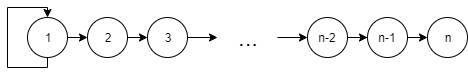

#### a) Set up a small experiment where you implement Hubs and Authorities on a graph of this form for a *specific* value of $n$, such as $n=6$.  Run the algorithm the "max-element equals 1" normalization, and use a convergence check using the max-norm ($L_\infty$) and a tolerance of $10^{-6}$.  Print the final Hubs and Authorities scores and how many iterations were run until convergence.

#### b) Set up the system of equations that represent taking one step of the HITS algorithm.  In other words, use markdown to explicitly state what $A^{new}$ will be as a function of $H^{old}$, and $H^{new}$ as a function of $A^{old}$.   I suggest you use your code from a) to check your work!

#### c) What will be the exact values of $A^{new}_j$ and $H^{new}_j$ resulting from the $j$th pass through the HITS algorithm, after normalization?

#### d) Your code in a) should have converged to the thereotical result from taking the *limit* (after many iterations) of the argument you constructed in c).  *Exactly* how many steps did it take until you converged?  Is this consistent with the theoretical result in part b?